In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#import dataframe
path = r'C:\Users\nrsmi\OneDrive\Documents\CareerFoundry\09-2024 Advanced Analytics & Dashboard\Python\10-2024 Analyzing Global Temperature Changes'
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared Data', 'df_TC_climate_region_CLEAN.csv'), index_col = False)

In [4]:
df.columns

Index(['Country', 'Months', 'Element', 'Year', 'Temperature', 'Region',
       'Climate'],
      dtype='object')

In [5]:
df.head(20)

,Country,Months,Element,Year,Temperature,Region,Climate
0,Afghanistan,January,Temperature Change,1961,0.777,Asia,Continental
1,Afghanistan,February,Temperature Change,1961,-1.743,Asia,Continental
2,Afghanistan,March,Temperature Change,1961,0.516,Asia,Continental
3,Afghanistan,April,Temperature Change,1961,-1.709,Asia,Continental
4,Afghanistan,May,Temperature Change,1961,1.412,Asia,Continental
5,Afghanistan,June,Temperature Change,1961,-0.058,Asia,Continental
6,Afghanistan,July,Temperature Change,1961,0.884,Asia,Continental
7,Afghanistan,August,Temperature Change,1961,0.391,Asia,Continental
8,Afghanistan,September,Temperature Change,1961,1.445,Asia,Continental
9,Afghanistan,October,Temperature Change,1961,-1.102,Asia,Continental


In [6]:
#aggregate temperature for each country for each year
df_agg_country = df.groupby(['Country', 'Year'], as_index=False)['Temperature'].mean()
df_agg_country

,Country,Year,Temperature
0,Afghanistan,1961,0.072750
1,Afghanistan,1962,-0.229833
2,Afghanistan,1963,0.891583
3,Afghanistan,1964,-0.980000
4,Afghanistan,1965,0.010000
...,...,...,...
15040,Zimbabwe,2015,1.258333
15041,Zimbabwe,2016,1.164583
15042,Zimbabwe,2017,0.224833
15043,Zimbabwe,2018,0.547167


In [7]:
#aggregate temperature for each region for each year
df_agg_reg = df.groupby(['Region', 'Year'], as_index=False)['Temperature'].mean()
df_agg_reg

,Region,Year,Temperature
0,Africa,1961,-0.003192
1,Africa,1962,-0.006731
2,Africa,1963,0.046923
3,Africa,1964,-0.176579
4,Africa,1965,-0.226967
...,...,...,...
349,Oceania,2015,0.765275
350,Oceania,2016,1.264321
351,Oceania,2017,1.093332
352,Oceania,2018,0.918318


In [8]:
#aggregate temperature for each climate for each year
df_agg_climate = df.groupby(['Climate', 'Year'], as_index=False)['Temperature'].mean()
df_agg_climate

,Climate,Year,Temperature
0,Arid,1961,-0.170844
1,Arid,1962,0.368508
2,Arid,1963,0.283534
3,Arid,1964,-0.362659
4,Arid,1965,-0.130345
...,...,...,...
349,Tropical,2015,1.203883
350,Tropical,2016,1.314309
351,Tropical,2017,1.141415
352,Tropical,2018,1.031955


In [9]:

#rename columns
#df_temp_agg = df_temp_agg.reset_index() # Reset the Index to bring Country back as a column
#df_temp_agg.columns = ['Country', 'Mean_Temperature_Change']  # Rename the columns
#df_temp_agg.head()

# Explore your data visually

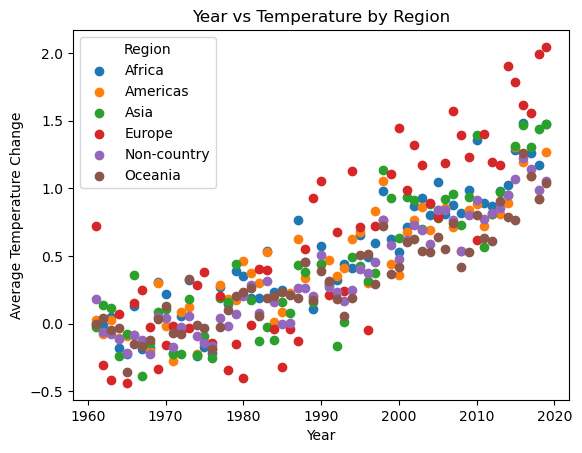

In [11]:
# Scatter plot for Year vs Temperature color-coded by Region
for region in df_agg_reg['Region'].unique():
    subset = df_agg_reg[df_agg_reg['Region'] == region]
    scatterplot1 = plt.scatter(subset['Year'], subset['Temperature'], label=region)

plt.title('Year vs Temperature by Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change')
plt.legend(title='Region')
plt.show()

In [12]:
# save scatterplot
scatterplot1.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'Year vs Temperature by Region.png'))

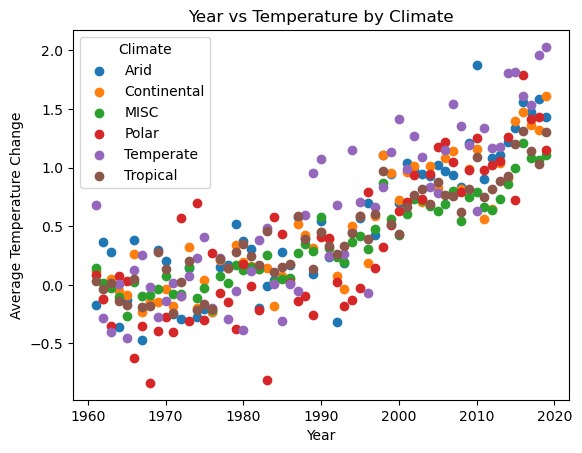

In [13]:
# Scatter plot for Year vs Temperature color-coded by Climate
for climate in df_agg_climate['Climate'].unique():
    subset = df_agg_climate[df_agg_climate['Climate'] == climate]
    scatterplot2 = plt.scatter(subset['Year'], subset['Temperature'], label=climate)

plt.title('Year vs Temperature by Climate')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change')
plt.legend(title='Climate')
plt.show()

In [14]:
# save scatterplot
scatterplot2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'Year vs Temperature by Climate.png'))

# 5. State your hypothesis in a markdown cell within your Jupyter notebook.

## Hypothesis:  Temperatures have increased consistently over the past several decades

In [70]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_agg_reg['Year'].values.reshape(-1,1)
y = df_agg_reg['Temperature'].values.reshape(-1,1)

In [72]:
X

array([[1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [19

In [74]:
y

array([[-3.19196429e-03],
       [-6.73065476e-03],
       [ 4.69226190e-02],
       [-1.76578869e-01],
       [-2.26967262e-01],
       [ 1.31723214e-01],
       [-1.84084821e-01],
       [-1.77660714e-01],
       [ 3.04709821e-01],
       [ 2.17806548e-01],
       [-2.15568452e-01],
       [ 5.80982143e-02],
       [ 3.21072917e-01],
       [-2.40983631e-01],
       [-1.70482280e-01],
       [-2.16700775e-01],
       [ 2.71890966e-01],
       [ 1.44436090e-01],
       [ 3.89487805e-01],
       [ 3.51081538e-01],
       [ 1.87583841e-01],
       [ 1.92577039e-01],
       [ 5.40754977e-01],
       [ 2.31753846e-01],
       [ 2.47645963e-01],
       [ 2.19382309e-01],
       [ 7.67418535e-01],
       [ 4.52537291e-01],
       [ 1.10885496e-01],
       [ 5.74476190e-01],
       [ 3.00285714e-01],
       [ 3.20089552e-01],
       [ 4.43128399e-01],
       [ 4.12303120e-01],
       [ 6.54540984e-01],
       [ 4.92940653e-01],
       [ 5.99158295e-01],
       [ 9.79290087e-01],
       [ 6.2

In [76]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [78]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [80]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [82]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

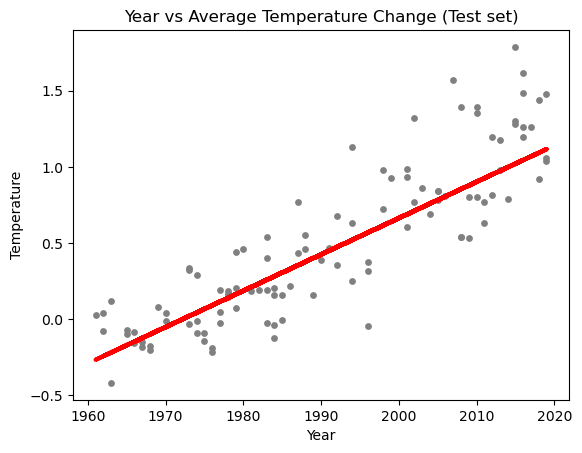

In [102]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plt_test = plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs Average Temperature Change (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Temperature')
plot_test.show()

In [104]:
# save scatterplot
plt_test.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'Plot Test.png'))

# 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### The regression line fits the data fairly well and shows that, overall, temperatures have increased over the years. Most of the points are close to the line, which means the model does a good job of following the general trend. However, some points, especially in recent years, are more spread out from the line. This shows that while the model captures the main pattern of rising temperatures, it doesn’t fully account for all the details or variations. Overall, the line works well for showing the basic trend but might not be perfect for capturing all changes.

# 11. Check the model performance statistics—MSE and R2 score.

In [86]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [97]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02383468]]
Mean squared error:  0.06857343940378013
R2 score:  0.7501134578516221


In [90]:
y_predicted

array([[-0.12326279],
       [ 0.25809206],
       [-0.14709746],
       [ 0.71095093],
       [ 0.47260416],
       [ 0.11508399],
       [ 1.04463642],
       [-0.24243618],
       [ 0.61561222],
       [ 1.11614045],
       [ 0.35343077],
       [ 0.87779368],
       [ 1.04463642],
       [ 0.25809206],
       [ 0.16275335],
       [ 0.92546303],
       [ 0.13891867],
       [ 0.78245497],
       [-0.12326279],
       [ 0.61561222],
       [ 0.56794287],
       [ 0.87779368],
       [ 0.80628964],
       [ 0.90162835],
       [ 1.02080174],
       [ 0.97313239],
       [ 0.13891867],
       [ 0.18658802],
       [ 0.09124931],
       [ 0.71095093],
       [ 0.04357996],
       [-0.07559343],
       [ 0.97313239],
       [ 1.04463642],
       [ 1.02080174],
       [ 0.04357996],
       [ 0.56794287],
       [ 0.52027351],
       [ 0.16275335],
       [ 1.02080174],
       [ 0.2104227 ],
       [ 0.68711625],
       [ 0.25809206],
       [ 0.37726544],
       [ 0.94929771],
       [-0

# 12. Compare the predicted y values with the actual y values in a dataframe.

In [92]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-0.184085,-0.123263
1,-0.021642,0.258092
2,-0.153551,-0.147097
3,1.319865,0.710951
4,0.355302,0.472604
5,0.045583,0.115084
6,1.197321,1.044636
7,-0.077208,-0.242436
8,0.979290,0.615612
9,1.056258,1.116140


# 13. Include your thoughts on how well the model performed on the test set in a markdown cell.- 
Include any reflections you have on the impact of possible data bias.

### The model performs fairly well, it shows a general trend and many predicted values are close to the actual ones. However, there some that are quite different from the actual values, indicating room for improvement. These issues could be a result of having data from locations all over the globe, and maybe by separating the data into the separate regions could make for a more accurate model.  